# Simulação de Lançamento

Estudando o o lançamento de um projétil.

## Introdução

Podemos endender o lançamento de um projétil como qualquer movimento não vertical, que está sujeito às ações de algumas forças naturais, tal como a própria **gravidade**.

Neste caso, temos a resistencia do ar sendo considerada desprezível, e então não entrará em equação.

O movimento será tratado em duas dimenções, então podemos representálo em um plano cartesiano.

## Projeto

Considerando as informações que discutimos em sala de aula nos dias 25/08/2022 e 01/09/2022, montem uma simulação capaz de descrever o lançamento balistico de um projetil de velocidade inicial $v_0$ e ângulo de lançamento theta ($\theta$).

Os dados de saida devem ser apresentados numa tabela com as colunas de tempo, posição $X$, posição $Y$, componente  horizontal da velocidade $v_x$, componente vertical da velocidade $v_y$, velocidade total $v_t$ e ângulo da velocidade alpha.

## Código

In [39]:
import math
import numpy as np
import matplotlib.pyplot as plt

A partícula sendo lançada com uma angulação menor que $90^{\circ}$, apresentará uma trajetória não vertical em relação ao solo, analogamente, caso o angulo de lançamento seja de $0^{\circ}$ podemos designa-lo como um lançamento horigontal.

A trajetória acontece com a associação de dois movimentos:
- O componente horizontal de movimento;
- O componente vertical de movimento.

Teremos o componente horizontal como um movimento retilíneo e uniforme, e o componendo vertical como um movimento uniformemente variádo, pois está sujeito às ações da gravidade.

O corpo é lançado com velocidade inicial $v_i$. Podemos decompor o vetor da velocidade em dois componentes $v_x$ e $v_y$ que são **perpendiculares** entre sí. A partir da velocidade inicial, podemos usar propriedades do triângulo retângulo para descobrir seus catetos (velocidade nos eixos $x$ e $y$), tal que:

$$
v_x = v_i \cdot cos\theta
$$

In [40]:
def Vx(ang=0, vi=0.0):
    a = math.radians(ang)
    return vi * math.cos(a)

Analogamente com o eixo $y$, porém a componente vertical está sujeita às ações da aceleração da gravidade $g$ com projeção negativas ($-g$). O componente varia com o tempo, de forma que:

$$
v_y = v_i \cdot sin \theta - gt
$$

In [41]:
def Vy(ang=0, vi=0.0, g=9.81, t=0.0):
    a = math.radians(ang)
    return vi * math.sin(a) - g*t

No eixo da abscissas ($x$) qualquer influência gravitacional é $nula$, portanto o movimento é retilíneo e uniforme. Esse espaço percorrido pela partícula no eixo $x$ (interpretação atual da variação) irá variar em relação eo tempo de observação, de forma crescente e cosntante.

$$
x(t) = x_i + v_x \cdot t
$$

In [42]:
def Px(xi=0.0, vx=0.0, t=0.0):
    return xi + vx * t

Já o eixo das ordenadas ($y$) a projeção da gavidade $g$ se torna $-g$, e também varia em relação à variação total do tempo.

$$
y(t) = y_i + v_y \cdot t - \frac{gt^{2}}{2}
$$

In [43]:
def Py(yi=0.0, vy=0.0, g=9.81, t=0.0):
    #print(yi, vy, g, t)
    return yi + (vy * t) - ((g * (t**2))/2)

Tendo o valor da velocidade em ambos os eixos podemos usar o Teorema de Pitágoras para descobrira o valor da velocidade total, em sua forma vetorial.

$$
v_t = \sqrt{v_x^{2}+v_y^{2}}
$$

In [44]:
def Vt(vx=0.0, vy=0.0):
    s = (vx**2) + (vy**2)
    return math.sqrt(s)

$$
\theta = arc tg \frac{v_y}{v_x}
$$

In [45]:
def Ang(vx=0.0, vy=0.0):
    return math.atan(vy/vx)

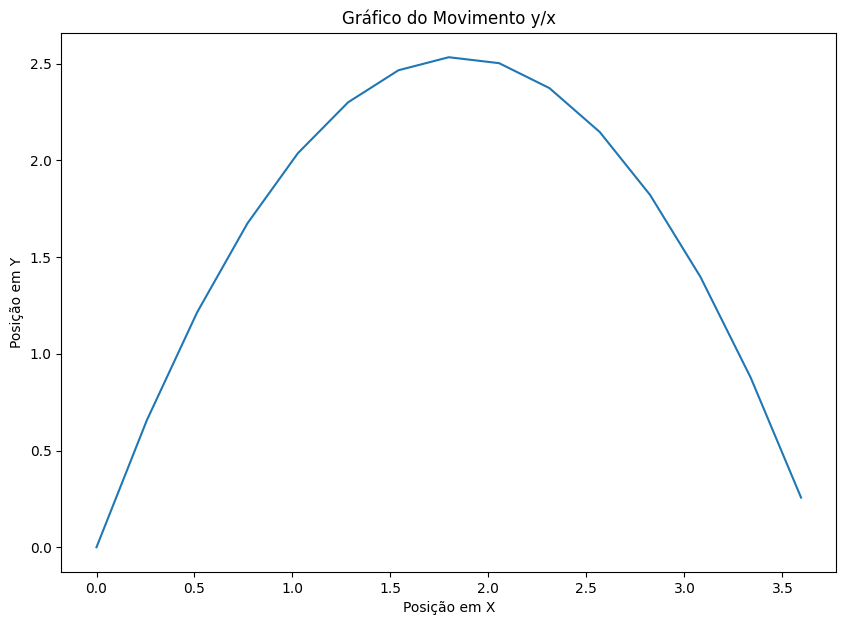

In [46]:
ang = 70
vi  = 13
init = 0.0
end  = 2.8301

x = np.array([0])
y = np.array([0])

for i in np.linspace(init,end,dtype=float, num=50):
    vx = Vx(ang=ang,vi=vi)
    vy = Vy(ang=ang,vi=vi,t=i)
    px = Px(vx=vx,t=i)
    py = Py(vy=vy,t=i)
    if py < 0:
        break
    x = np.append(x,px)
    y = np.append(y,py)

#print(x)
fig, ax = plt.subplots()
fig.set_size_inches(10,7);
ax.plot(x,y)
ax.set_title("Gráfico do Movimento y/x");
ax.set_xlabel("Posição em X");
ax.set_ylabel("Posição em Y");
plt.show()